In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from rcpl.config import BASE_DIR, FIGURES_DIR, MPL_RC, CONFIGS_DIR
from rcpl.prediction import ChainPredictor

mpl.rcParams.update(MPL_RC)
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [116]:
DEVICE = 'cuda'
D1 = 'exp2023-11-23.maftr2_4.template'
D2 = 'maftr2_4.template'

In [94]:
exp_path, e_id = BASE_DIR / 'data/epsp_stress/measured/2023-11-23.json', 1
# exp_path, e_id = BASE_DIR / 'data/epsp_stress/measured/2023-11-07.json', 2

In [95]:
gru_predictor = ChainPredictor(config_path=CONFIGS_DIR / 'maftr/maftr2_4.best/gru.yaml', predicts_scaled_theta=True)
ttopt_predictor = ChainPredictor(config_path=CONFIGS_DIR / 'maftr/maftr2_4.best/ttopt.yaml', predicts_scaled_theta=False)

In [97]:
# unscaled_theta_prediction, stress_pred = ttopt_predictor.predict_from_json(exp_path)

In [98]:
unscaled_theta_opt_ttopt, stress_pred_opt_ttopt, _ = ttopt_predictor.predict_from_json_simplex(exp_path)

Origin score: 83.66, Nelder-Mead score: 74.75


In [100]:
for i in unscaled_theta_opt_ttopt:
    print(i)

38.659492
387.05273
0.0112703685
18681.84
1704.2593
1923.0457
277.5675
52.153976
70.29988
1.0019674
16.508648
15.227308


In [104]:
gru_predictor.benchmark(exp_path, 100)

0.0029297487100120633

In [105]:
unscaled_theta_gru, stress_pred_gru = gru_predictor.predict_from_json(exp_path)
unscaled_theta_opt_gru, stress_pred_opt_gru, _ = gru_predictor.predict_from_json_simplex(exp_path, verbose=True)

Origin score: 2441.20, Nelder-Mead score: 75.75


In [107]:
validate_crlb = gru_predictor.validate_crlb(exp_path, crop_signal=[0, 681])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 223.52it/s]


In [108]:
if exp_path.stem == '2023-11-07':
    x_lim = 450

    col0 = '#005500'
    col1 = '#dd0000'
    col2 = '#244BB5'
    lw=.8

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7.75, 4), sharex=True, gridspec_kw={'height_ratios': [3, 4, 3], 'hspace': 0.05})

    ax1.plot(validate_crlb['signal0'][:x_lim], color='#005500', lw=lw)
    ax1.set_xlabel('Samples')
    ax1.set_ylabel('Plastic deformation')
    ax1.set_xlim([-5,5+x_lim])
    # ax1.legend()

    ax2.plot(validate_crlb['stress_true'][:x_lim], label='Experimental', color=col0, lw=lw)
    # ax2.plot(validate_crlb['stress_true'][:x_lim], '.', color='#005500')
    ax2.plot(stress_pred_opt_ttopt[:x_lim], label='TTOpt (r)', color=col1, lw=lw)
    ax2.plot(stress_pred_opt_gru[:x_lim], label='GRU (r)', color=col2, lw=lw)
    ax2.set_ylabel('Stress $S$ (MPa)')
    ax2.legend(ncol=3, loc='lower right')
    ax2.set_ylim([-610, 440])

    ax3.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    ax3.plot((stress_pred_opt_ttopt.numpy()-np.array(validate_crlb['stress_true']))[:x_lim], label='TTOpt (r)', color=col1, lw=lw)
    ax3.plot((stress_pred_opt_gru.numpy()-np.array(validate_crlb['stress_true']))[:x_lim], label='GRU (r)', color=col2, lw=lw)
    ax3.set_ylabel('$\\Delta S$ (MPa)')
    ax3.set_xlabel('Samples')
    ax3.legend(loc='upper right', ncol=2)

    plt.tight_layout()
    plt.savefig(FIGURES_DIR / f'{exp_path.stem}.exp_sim_opt.pdf', bbox_inches='tight', pad_inches=0)
    plt.show()

In [109]:
if exp_path.stem == '2023-11-23':
    x_lim = 450
    
    lw = .8
    col0 = '#005500'
    col1 = '#dd0000'
    col2 = '#244BB5'

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7.75, 4), sharex=True, gridspec_kw={'height_ratios': [3, 3, 3], 'hspace': 0.05})

    ax1.plot(validate_crlb['signal0'][:x_lim], color='#005500', lw=lw)
    ax1.set_xlabel('Samples')
    ax1.set_ylabel('Plastic deformation')
    ax1.set_xlim([-5,5+x_lim])
    # ax1.legend()

    ax2.plot(validate_crlb['stress_true'][:x_lim], label='Experimental', color=col0, lw=lw)
    # ax2.plot(validate_crlb['stress_true'][:x_lim], '.', color='#005500', markersize=1)
    ax2.plot(stress_pred_opt_ttopt[:x_lim], label='TTOpt (r)', color=col1, lw=lw)
    ax2.plot(stress_pred_opt_gru[:x_lim], label='GRU (r)', color=col2, lw=lw)
    ax2.set_ylabel('Stress $S$ (MPa)')
    ax2.legend(ncol=3, loc='lower right')
    ax2.set_ylim([-490, 440])

    ax3.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    ax3.plot((stress_pred_opt_ttopt.numpy()-np.array(validate_crlb['stress_true']))[:x_lim], label='TTOpt (r)', color=col1, lw=lw)
    ax3.plot((stress_pred_opt_gru.numpy()-np.array(validate_crlb['stress_true']))[:x_lim], label='GRU (r)', color=col2, lw=lw)
    ax3.set_ylabel('$\\Delta S$ (MPa)')
    ax3.set_xlabel('Samples')
    ax3.legend(ncol=2, loc='lower right')

    plt.tight_layout()
    
    plt.savefig(FIGURES_DIR / f'{exp_path.stem}.exp_sim_opt.pdf', bbox_inches='tight', pad_inches=0)

    plt.show()

/tmp/ipykernel_1624859/2569795204.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


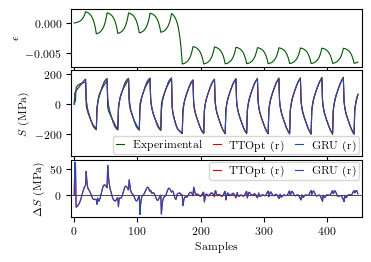

In [119]:
if exp_path.stem == '2024-03-06':
    
    x_lim = 450
    
    lw = .8
    col0 = '#005500'
    col1 = '#dd0000'
    col2 = '#244BB5'

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(3.75, 2.7), sharex=True, gridspec_kw={'height_ratios': [2, 3, 2], 'hspace': 0.05})

    ax1.plot(validate_crlb['signal0'][:x_lim], color='#005500', lw=lw)
    ax1.set_xlabel('Samples')
    ax1.set_ylabel(r'$\epsilon$')
    ax1.set_xlim([-5,5+x_lim])
    # ax1.legend()

    ax2.plot(validate_crlb['stress_true'][:x_lim], label='Experimental', color=col0, lw=lw)
    # ax2.plot(validate_crlb['stress_true'][:x_lim], '.', color='#005500', markersize=1)
    ax2.plot(stress_pred_opt_ttopt[:x_lim], label='TTOpt (r)', color=col1, lw=lw)
    ax2.plot(stress_pred_opt_gru[:x_lim], label='GRU (r)', color=col2, lw=lw)
    ax2.set_ylabel('$S$ (MPa)')
    # ax2.legend(ncol=3, loc='lower right')
    ax2.legend(ncol=3, loc='lower right',frameon=True, labelspacing=0., handlelength=.7, fontsize=8, borderpad=0.3, columnspacing=1, borderaxespad=0.2)

    ax2.set_ylim([-350, 230])

    ax3.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    ax3.plot((stress_pred_opt_ttopt.numpy()-np.array(validate_crlb['stress_true']))[:x_lim], label='TTOpt (r)', color=col1, lw=lw)
    ax3.plot((stress_pred_opt_gru.numpy()-np.array(validate_crlb['stress_true']))[:x_lim], label='GRU (r)', color=col2, lw=lw)
    ax3.set_ylabel('$\\Delta S$ (MPa)')
    ax3.set_xlabel('Samples')
    # ax3.legend(ncol=2, loc='lower right')
    ax3.legend(ncol=2, loc='upper right',frameon=True, labelspacing=0., handlelength=.7, fontsize=8, borderpad=0.3, columnspacing=1, borderaxespad=0.2)

    plt.tight_layout()
    plt.savefig(FIGURES_DIR / f'{exp_path.stem}.exp_sim_opt.pdf', bbox_inches='tight', pad_inches=0)

    plt.show()

In [115]:
if exp_path.stem == '2024-03-08':
    
    x_lim = 450
    
    lw = .8
    col0 = '#005500'
    col1 = '#dd0000'
    col2 = '#244BB5'

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(3.75, 2.7), sharex=True, gridspec_kw={'height_ratios': [2, 3, 2], 'hspace': 0.05})

    ax1.plot(validate_crlb['signal0'][:x_lim], color='#005500', lw=lw)
    ax1.set_xlabel('Samples')
    ax1.set_ylabel(r'$\epsilon$ (-)')
    ax1.set_xlim([-5,5+x_lim])
    # ax1.legend()

    ax2.plot(validate_crlb['stress_true'][:x_lim], label='Experimental', color=col0, lw=lw)
    # ax2.plot(validate_crlb['stress_true'][:x_lim], '.', color='#005500', markersize=1)
    ax2.plot(stress_pred_opt_ttopt[:x_lim], label='TTOpt (r)', color=col1, lw=lw)
    ax2.plot(stress_pred_opt_gru[:x_lim], label='GRU (r)', color=col2, lw=lw)
    ax2.set_ylabel('$S$ (MPa)')
    # ax2.legend(ncol=3, loc='lower right')
    ax2.legend(ncol=3, loc='lower right',frameon=True, labelspacing=0., handlelength=.7, fontsize=7, borderpad=0.3, columnspacing=1, borderaxespad=0.2)

    ax2.set_ylim([-400, 260])

    ax3.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    ax3.plot((stress_pred_opt_ttopt.numpy()-np.array(validate_crlb['stress_true']))[:x_lim], label='TTOpt (r)', color=col1, lw=lw)
    ax3.plot((stress_pred_opt_gru.numpy()-np.array(validate_crlb['stress_true']))[:x_lim], label='GRU (r)', color=col2, lw=lw)
    ax3.set_ylabel('$\\Delta S$ (MPa)')
    ax3.set_xlabel('Samples')
    # ax3.legend(ncol=2, loc='lower right')
    ax3.legend(ncol=2, loc='lower right',frameon=True, labelspacing=0., handlelength=.7, fontsize=7, borderpad=0.3, columnspacing=1, borderaxespad=0.2)

    plt.tight_layout()
    plt.savefig(FIGURES_DIR / f'{exp_path.stem}.exp_sim_opt.pdf', bbox_inches='tight', pad_inches=0)

    plt.show()